In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
df=pd.read_csv('Customer _Dataset.csv')

In [11]:
df.head(2)

,cust_id,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,60124,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,60124,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [12]:
df.shape

(286392, 36)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cust_id           286392 non-null  int64  
 1   order_id          286392 non-null  int64  
 2   order_date        286392 non-null  object 
 3   status            286392 non-null  object 
 4   item_id           286392 non-null  int64  
 5   sku               286392 non-null  object 
 6   qty_ordered       286392 non-null  int64  
 7   price             286392 non-null  float64
 8   value             286392 non-null  float64
 9   discount_amount   286392 non-null  float64
 10  total             286392 non-null  float64
 11  category          286392 non-null  object 
 12  payment_method    286392 non-null  object 
 13  bi_st             286392 non-null  object 
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [9]:
# Checking null values
df.isnull().values.any()

False

In [10]:
#checking missing values
print(df.isna().sum())

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64


In [5]:
df.head(2)

,cust_id,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,60124,100354678,01-10-2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,60124,100354678,01-10-2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [18]:
# Create the user-item interaction matrix (binary)
interaction_matrix = pd.crosstab(df['cust_id'], df['item_id'])

1

In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame
max_user_id = df['cust_id'].max()
print(f"Maximum user ID: {max_user_id}")
print(f"Number of unique users: {df['cust_id'].nunique()}")

Maximum user ID: 115326
Number of unique users: 64248


In [22]:
df['cust_id'].value_counts().head(10)

85775    2524
87724     707
96927     608
65910     436
39707     397
44830     329
9510      306
83736     304
8591      285
800       277
Name: cust_id, dtype: int64

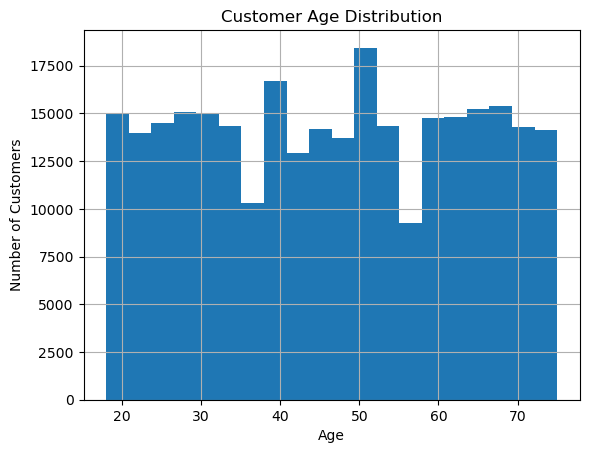

In [25]:
import matplotlib.pyplot as plt

df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Age Distribution')
plt.show()

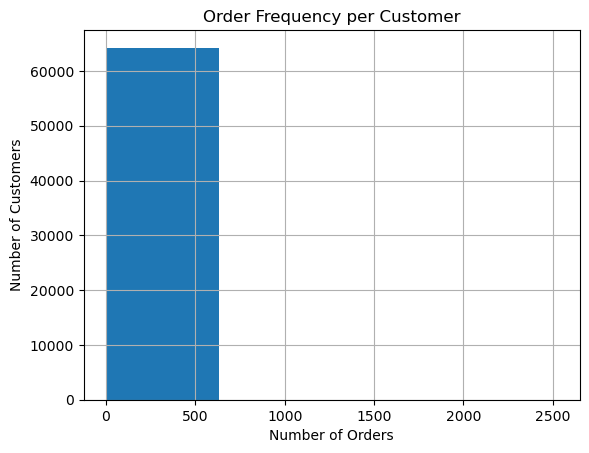

In [37]:
df.groupby('cust_id')['order_id'].count().hist(bins=4)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Order Frequency per Customer')
plt.show()

In [28]:
df['item_id'].value_counts().head(10)

574772    1
748047    1
748052    1
748051    1
748050    1
748049    1
748102    1
748048    1
861774    1
748040    1
Name: item_id, dtype: int64

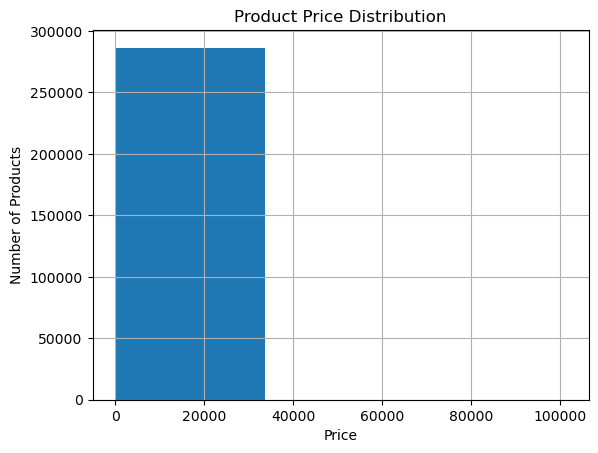

In [43]:
#Analyze product price distribution
df['price'].hist(bins=3)
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.title('Product Price Distribution')
plt.show()

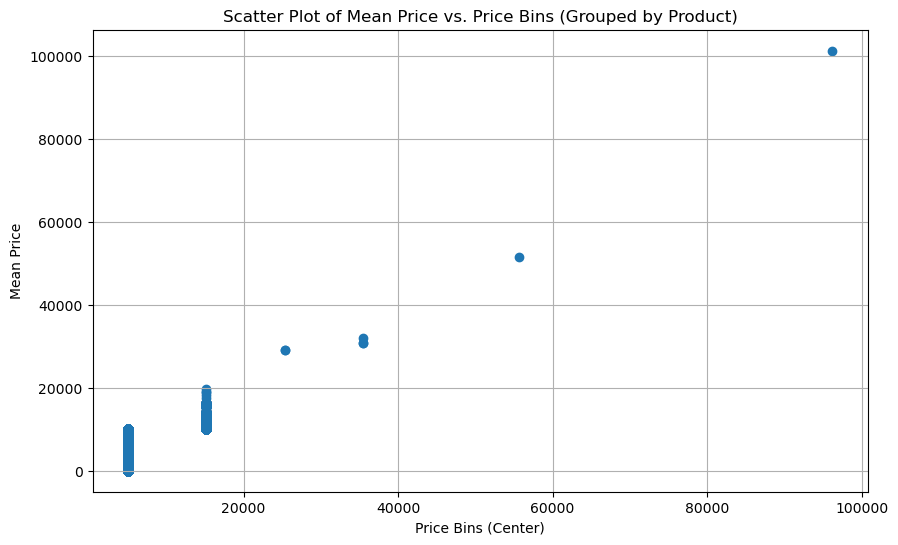

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

def scatter_plot_with_bins(products, prices, bins=10):
    """
    Creates a scatter plot of prices vs. products, with prices binned.

    Args:
        products (list or pandas.Series): List or Series of product names.
        prices (list or pandas.Series): List or Series of corresponding prices.
        bins (int or list): Number of bins or explicit bin edges.
    """

    if len(products) != len(prices):
        raise ValueError("Products and prices lists must have the same length.")

    if isinstance(products, pd.Series):
        products = products.tolist()

    if isinstance(prices, pd.Series):
        prices = prices.tolist()

    #df = pd.DataFrame({'product': products, 'price': prices})

    if isinstance(bins, int):
        df['price_bin'] = pd.cut(df['price'], bins=bins)
    else:
        df['price_bin'] = pd.cut(df['price'], bins=bins)

    grouped = df.groupby(['item_id', 'price_bin'])['price'].mean().reset_index(name='mean_price')

    bin_centers = grouped['price_bin'].apply(lambda x: x.mid)

    plt.figure(figsize=(10, 6))
    plt.scatter(bin_centers, grouped['mean_price'])
    plt.xlabel('Price Bins (Center)')
    plt.ylabel('Mean Price')
    plt.title('Scatter Plot of Mean Price vs. Price Bins (Grouped by Product)')
    plt.grid(True)
    plt.show() # Make absolutely sure this line is executed

# Example Usage:
products = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C']
prices = [10, 20, 30, 12, 22, 32, 15, 25, 35, 18, 28, 38]

scatter_plot_with_bins(products, prices, bins=10)

In [49]:
plt.show()

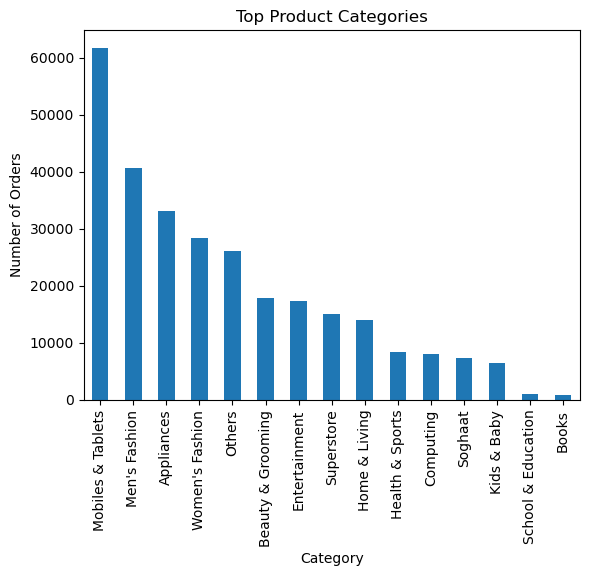

In [30]:
#Check popular product categories
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.title('Top Product Categories')
plt.show()

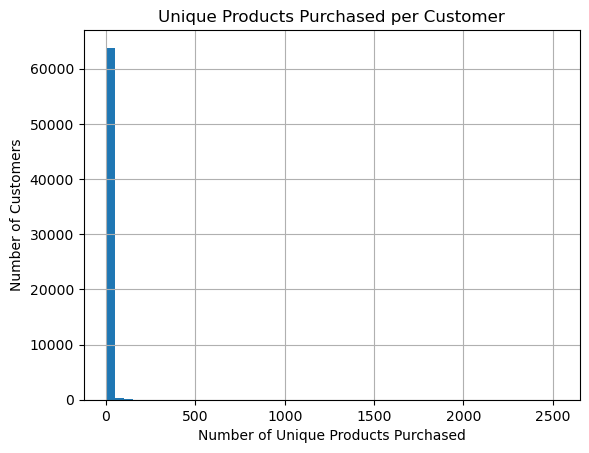

In [32]:
df.groupby('cust_id')['item_id'].nunique().hist(bins=50)
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Number of Customers')
plt.title('Unique Products Purchased per Customer')
plt.show()

In [33]:
df.groupby('order_id')['item_id'].apply(lambda x: list(x)).head(10)

order_id
100354677    [574769, 574770, 574771]
100354678            [574772, 574774]
100354679            [574775, 574776]
100354680            [574777, 574779]
100354681                    [574781]
100354682                    [574782]
100354683            [574783, 574785]
100354684                    [574787]
100354685                    [574788]
100354686                    [574789]
Name: item_id, dtype: object

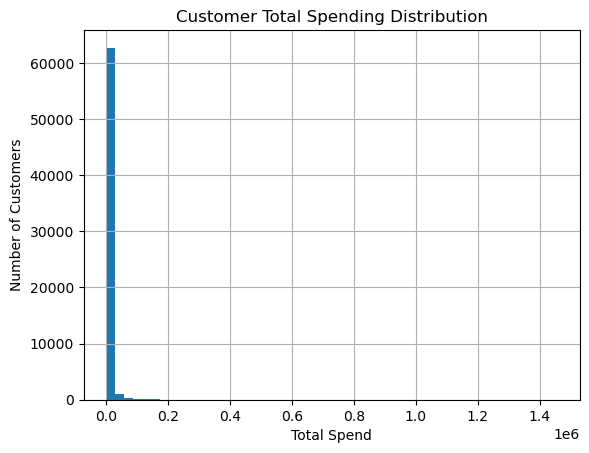

In [34]:
df.groupby('cust_id')['price'].sum().hist(bins=50)
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.title('Customer Total Spending Distribution')
plt.show()

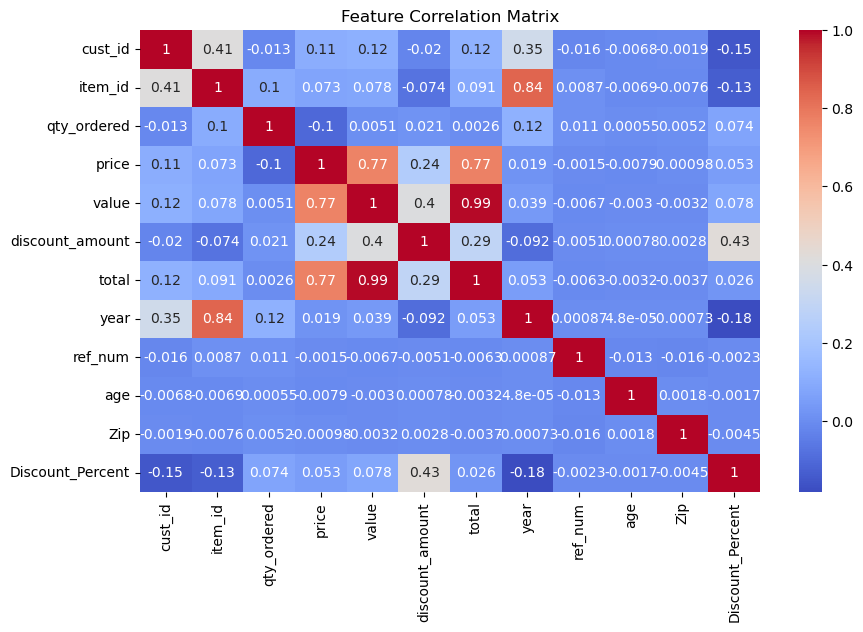

In [35]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

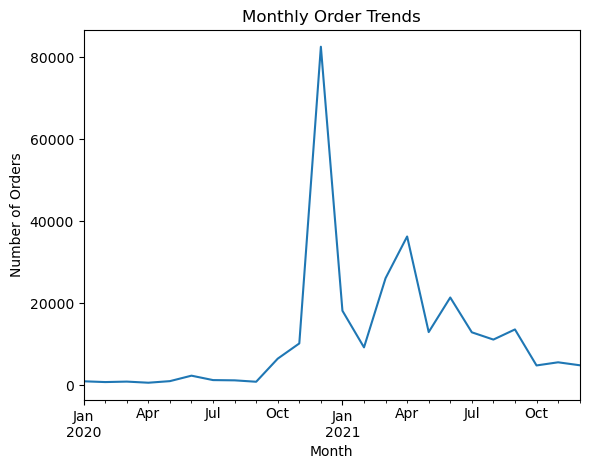

In [36]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date')['order_id'].resample('M').count().plot()
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Trends')
plt.show()

In [1]:
import pandas as pd
import scipy.sparse as sparse
from implicit.als import AlternatingLeastSquares

In [14]:
# Map customer & product IDs to sequential index values
customer_mapping = {id: i for i, id in enumerate(df["cust_id"].unique())}
product_mapping = {id: i for i, id in enumerate(df["item_id"].unique())}

df["customer_index"] = df["cust_id"].map(customer_mapping)
df["product_index"] = df["item_id"].map(product_mapping)

In [15]:
# Create sparse matrix
customer_product_matrix = sparse.csr_matrix(
    (df["order_id"], (df["customer_index"], df["product_index"]))
)

# Train ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)
model.fit(customer_product_matrix)


  0%|          | 0/20 [00:00<?, ?it/s]

In [25]:
cust_id = 60124  # Replace with an actual customer ID

if cust_id in customer_mapping:
    customer_index = customer_mapping[cust_id]
    recommendations = model.recommend(customer_index, customer_product_matrix[customer_index], N=5)

    # Convert back to original product IDs
    recommended_product_ids = [list(product_mapping.keys())[i] for i, _ in recommendations]
    print("Recommended Products:", recommended_product_ids)
else:
    print("Customer ID not found in dataset.")


ValueError: too many values to unpack (expected 2)

In [23]:
print("Sample customer IDs in mapping:", list(customer_mapping.keys())[:10])

Sample customer IDs in mapping: [60124, 42485, 53620, 56836, 60125, 51286, 60126, 60127, 60128, 56449]


In [32]:
cust_id = 60124  # Replace with an actual customer ID from your dataset

if cust_id in customer_mapping:
    customer_index = customer_mapping[cust_id]
    recommendations = model.recommend(customer_index, customer_product_matrix[customer_index], N=5)

    # Debugging: Print the full recommendation output
    print("Raw Recommendations:", recommendations)
    
    # Extract recommended product indices and scores
    recommended_indices, scores = recommendations  # Correctly unpack the tuple

  # Convert indices back to actual product IDs
    recommended_product_ids = [list(product_mapping.keys())[i] for i in recommended_indices]

    print("Recommended Products:", recommended_product_ids)
else:
    print(f"Customer ID {customer_id} is not in the dataset. Try a different one.")


Raw Recommendations: (array([148226, 148227, 148225, 148224, 148228]), array([0.7778301 , 0.77338874, 0.7728708 , 0.77240485, 0.7679951 ],
      dtype=float32))
Recommended Products: [688924, 707047, 688923, 688922, 707048]
